In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tables import *
from Definitions import *

In [2]:
##
## Preformance data taken by bash

timeP = [[98.04143714904785, 98.13919425010681, 98.02484345436096, 98.16211891174316, 98.1004114151001]
,[203.414945602417, 205.08096599578857, 203.58111953735352, 203.99881625175476, 204.18684816360474]
,[303.20484018325806, 303.67770433425903, 303.3119010925293, 303.6479036808014, 303.5527038574219]
,[446.9786162376404, 446.9033498764038, 447.0940158367157, 446.90246534347534, 446.69354939460754]
,[544.8392629623413, 545.4899706840515, 544.8167815208435, 544.8780434131622, 544.8092813491821]
,[641.4418256282806, 641.0964317321777, 641.3814632892609, 641.2980263233185, 641.4577722549438]
,[750.2003285884857, 750.4886591434479, 750.2894694805145, 749.4064302444458, 749.6853437423706]
,[840.9001557826996, 841.1786069869995, 841.0704255104065, 840.3838970661163, 841.191771030426]
,[938.1929354667664, 938.8514523506165, 938.0374252796173, 939.1266903877258, 938.3532011508942]
,[986.3494074344635, 987.2489409446716, 985.9938867092133, 985.5933237075806, 986.1764788627625]]

timeF = [[128.13954830169678, 128.44959664344788, 128.53008913993835, 128.23990631103516, 128.28283190727234]
,[249.81406259536743, 249.19778728485107, 250.04763460159302, 250.09686303138733, 250.11051082611084]
,[377.11735582351685, 376.5042178630829, 378.6827030181885, 377.24834084510803, 377.2471649646759]
,[548.8362736701965, 548.5429267883301, 553.0491034984589, 548.4488642215729, 547.9937465190887]
,[668.5398008823395, 668.4305956363678, 668.9746043682098, 672.096097946167, 669.6227238178253]
,[747.089301109314, 751.6359288692474, 750.9972517490387, 747.0293309688568, 746.8877243995667]
,[924.9300441741943, 916.0243721008301, 916.6654999256134, 915.8436636924744, 919.4858725070953]
,[1039.2440330982208, 1039.8862249851227, 1037.3940560817719, 1038.8559305667877, 1038.4065420627594]
,[1160.6946461200714, 1161.7109143733978, 1161.3104765415192, 1159.7075824737549, 1167.6529366970062]
,[1276.647752046585, 1279.2157011032104, 1287.3643169403076, 1276.4544863700867, 1279.336987733841]]


# taking there mean and errors
timePV = np.mean(timeP,axis=1)
timePE = np.std(timeP,axis=1)

timeFV = np.mean(timeF,axis=1)
timeFE = np.std(timeF,axis=1)
x = [i for i in range(1,11)]

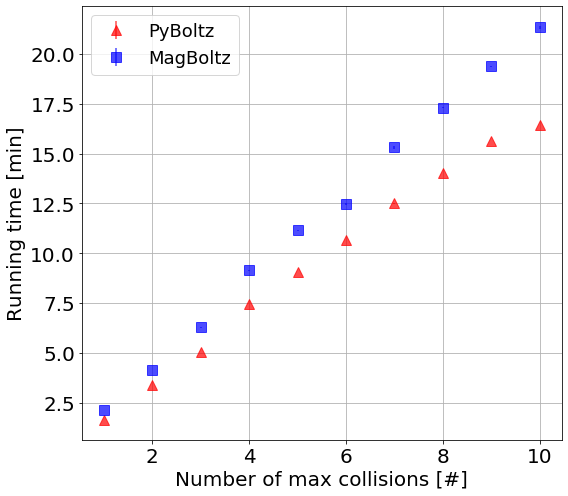

In [3]:
plt.figure(figsize=(8,7))

#plt.scatter(x, timePV/60, label = "PyBoltz")
#plt.scatter(x, timeFV/60, label = "Magboltz")
plt.errorbar(x, timePV/60,yerr=timePE/60,fmt="^",color='r',label="PyBoltz",alpha=0.7,ms=10)
plt.errorbar(x, timeFV/60,yerr=timeFE/60,fmt="s",color='b',label="MagBoltz",alpha=0.7,ms=10)

#plt.ylim(0.5,13.9)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.legend(loc="upper left",fontsize=18)
plt.grid()
plt.xlabel( r'Number of max collisions [#]',fontsize=20)
plt.ylabel(r"Running time [min]",fontsize=20)
plt.tight_layout()
#plt.savefig("Pyboltz_Pref.png",dpi=250,bbox_inches='tight')

plt.show()

In [4]:
##
## importing the datasets and simulation daata for the drift comparasion
##

## import magboltz
MBNe = np.load("Data/NeCO2.npy")
MBAr = np.load("Data/ArCH4.npy")

'''Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr,
                Tdiff, Terr, Ldiff, Lerr, LdiffTPC, LerrTPC, TdiffTPC,
                TerrTPC, Mele, Merr]
        Vals.append(len(E))
        Vals = Vals+E
        Vals = Vals+SPEC'''

## import data from csvs
NeDl = np.genfromtxt("Data/NeCO2-Dl.csv", delimiter=',')
NeDt = np.genfromtxt("Data/NeCO2-Dt.csv", delimiter=',')
NeV = np.genfromtxt("Data/NeCO2-vel.csv", delimiter=',')
ArDl = np.genfromtxt("Data/ArCH4-Dl.csv", delimiter=',')
ArDt = np.genfromtxt("Data/ArCH4-Dt.csv", delimiter=',')
ArV = np.genfromtxt("Data/ArCH4-vel.csv", delimiter=',')

## import pyboltz data
with open_file("Data/Neon-2.h5") as ar:
    PBNe_field = ar.root.CO2['10.0'].Reduced_Field.read()
    PBNe_vel = ar.root.CO2['10.0'].Drift_Velocity.read()
    PBNe_velE = ar.root.CO2['10.0'].Drift_Velocity_Error.read()
    PBNe_long = ar.root.CO2['10.0'].Long.read()
    PBNe_longE = ar.root.CO2['10.0'].LongE.read()
    PBNe_tran = ar.root.CO2['10.0'].Trans.read()
    PBNe_tranE = ar.root.CO2['10.0'].TransE.read()

with open_file("Data/Argon-2.h5") as ar:
    PBAr_field = ar.root.CH4['10.0'].Reduced_Field.read()
    PBAr_vel = ar.root.CH4['10.0'].Drift_Velocity.read()
    PBAr_velE = ar.root.CH4['10.0'].Drift_Velocity_Error.read()
    PBAr_long = ar.root.CH4['10.0'].Long.read()
    PBAr_longE = ar.root.CH4['10.0'].LongE.read()
    PBAr_tran = ar.root.CH4['10.0'].Trans.read()
    PBAr_tranE = ar.root.CH4['10.0'].TransE.read()

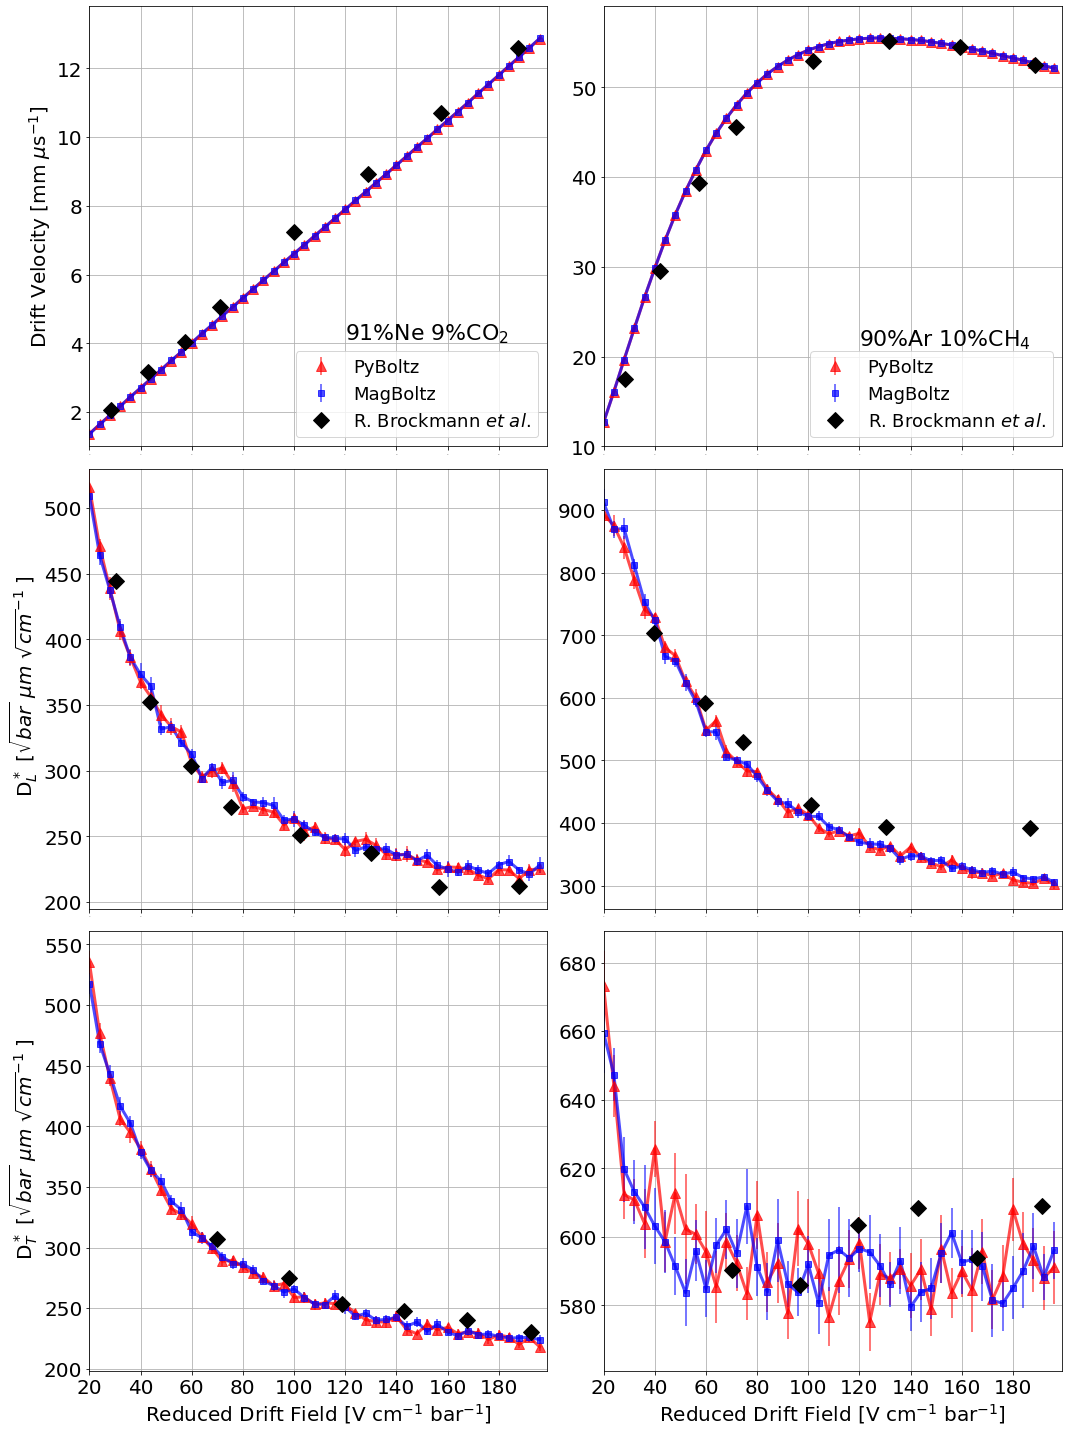

In [5]:
skip = 4
wid=3
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0)

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323, sharex=ax1)
ax4 = fig.add_subplot(324, sharex=ax2)
ax5 = fig.add_subplot(325, sharex=ax1)
ax6 = fig.add_subplot(326, sharex=ax2)
fig.subplots_adjust(hspace=0)

font_title = 22
font_ticks = 20
font_axis  = 20
title_pos  = (0.5, 0.91)

#ax1.set_title("Drift Velocity",fontsize=font_title,position=title_pos)
ax1.plot(PBNe_field[::skip],PBNe_vel[::skip],color='r',alpha=0.7,lw=wid)
ax1.plot(MBNe[:,4][::skip],MBNe[:,5][::skip],color='b',alpha=0.7,lw=wid)
ax1.errorbar(PBNe_field[::skip],PBNe_vel[::skip],yerr=PBNe_vel[::skip]*PBNe_velE[::skip]/100,fmt="^",ms=10,color='r',label="PyBoltz",alpha=0.7)
ax1.errorbar(MBNe[:,4][::skip],MBNe[:,5][::skip],yerr=MBNe[:,5][::skip]*MBNe[:,6][::skip]/100,fmt="s",color='b',label="MagBoltz",alpha=0.7)
ax1.errorbar(NeV[:,0],NeV[:,1]*10,ms=12,fmt="D",color='k',label="R. Brockmann $\it{et}$ $\it{al.}$")
ax1.tick_params(axis="x", labelsize=0)
ax1.tick_params(axis="y", labelsize=font_ticks)
ax1.set_ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=font_axis)
ax1.legend(loc="lower right",fontsize=18)
ax1.text(120,4.1,r"91%Ne 9%CO$_2$",fontsize=22)

#ax2.set_title("Drift Velocity",fontsize=font_title,position=title_pos)
ax2.plot(PBAr_field[::skip],PBAr_vel[::skip],color='r',alpha=0.7,lw=wid)
ax2.plot(MBAr[:,4][::skip],MBAr[:,5][::skip],color='b',alpha=0.7,lw=wid)
ax2.errorbar(PBAr_field[::skip],PBAr_vel[::skip],yerr=PBAr_vel[::skip]*PBAr_velE[::skip]/100,fmt="^",ms=10,color='r',label="PyBoltz",alpha=0.7)
ax2.errorbar(MBAr[:,4][::skip],MBAr[:,5][::skip],yerr=MBAr[:,5][::skip]*MBAr[:,6][::skip]/100,fmt="s",color='b',label="MagBoltz",alpha=0.7)
ax2.errorbar(ArV[:,0],ArV[:,1]*10,ms=12,fmt="D",color='k',label="R. Brockmann $\it{et}$ $\it{al.}$")
ax2.tick_params(axis="x", labelsize=0)
ax2.tick_params(axis="y", labelsize=font_ticks)
ax2.legend(loc="lower right",fontsize=18)
ax2.text(120,21.2,r"90%Ar 10%CH$_4$",fontsize=22)


#ax3.set_title("Longitudinal Diffusion",fontsize=font_title,position=title_pos)
ax3.plot(PBNe_field[::skip],PBNe_long[::skip],color='r',alpha=0.7,lw=wid)
ax3.plot(MBNe[:,4][::skip],MBNe[:,11][::skip],color='b',alpha=0.7,lw=wid)
ax3.errorbar(PBNe_field[::skip],PBNe_long[::skip],yerr=PBNe_long[::skip]*PBNe_longE[::skip]/100,fmt="^",ms=10,color='r',alpha=0.7)
ax3.errorbar(MBNe[:,4][::skip],MBNe[:,11][::skip],yerr=MBNe[:,11][::skip]*MBNe[:,12][::skip]/100,fmt="s",color='b',alpha=0.7)
ax3.errorbar(NeDl[:,0],NeDl[:,1],ms=12,fmt="D",color='k')
ax3.tick_params(axis="x", labelsize=0)
ax3.tick_params(axis="y", labelsize=font_ticks)
ax3.set_ylabel(r" D$^*_L$ [$\sqrt{bar}$ $\mu m$ $\sqrt{cm}^{-1}$ ]",fontsize=font_axis)


#ax4.set_title("Longitudinal Diffusion",fontsize=font_title,position=title_pos)
ax4.plot(PBAr_field[::skip],PBAr_long[::skip],color='r',alpha=0.7,lw=wid)
ax4.plot(MBAr[:,4][::skip],MBAr[:,11][::skip],color='b',alpha=0.7,lw=wid)
ax4.errorbar(PBAr_field[::skip],PBAr_long[::skip],yerr=PBAr_long[::skip]*PBAr_longE[::skip]/100,fmt="^",ms=10,color='r',alpha=0.7)
ax4.errorbar(MBAr[:,4][::skip],MBAr[:,11][::skip],yerr=MBAr[:,11][::skip]*MBAr[:,12][::skip]/100,fmt="s",color='b',alpha=0.7)
ax4.errorbar(ArDl[:,0],ArDl[:,1],ms=12,fmt="D",color='k')
ax4.tick_params(axis="x", labelsize=0)
ax4.tick_params(axis="y", labelsize=font_ticks)

#ax5.set_title("Transverse Diffusion",fontsize=font_title,position=title_pos)
ax5.plot(PBNe_field[::skip],PBNe_tran[::skip],color='r',alpha=0.7,lw=wid)
ax5.plot(MBNe[:,4][::skip],MBNe[:,13][::skip],color='b',alpha=0.7,lw=wid)
ax5.errorbar(PBNe_field[::skip],PBNe_tran[::skip],yerr=PBNe_tran[::skip]*PBNe_tranE[::skip]/100,fmt="^",ms=10,color='r',alpha=0.7)
ax5.errorbar(MBNe[:,4][::skip],MBNe[:,13][::skip],yerr=MBNe[:,13][::skip]*MBNe[:,14][::skip]/100,fmt="s",color='b',alpha=0.7)
ax5.errorbar(NeDt[:,0],NeDt[:,1],ms=12,fmt="D",color='k')
ax5.tick_params(axis="x", labelsize=font_ticks)
ax5.tick_params(axis="y", labelsize=font_ticks)
ax5.set_xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=font_axis)
ax5.set_ylabel(r" D$^*_T$ [$\sqrt{bar}$ $\mu m$ $\sqrt{cm}^{-1}$ ]",fontsize=font_axis)

#ax6.set_title("Transverse Diffusion",fontsize=font_title,position=title_pos)
ax6.plot(PBAr_field[::skip],PBAr_tran[::skip],color='r',alpha=0.7,lw=wid)
ax6.plot(MBAr[:,4][::skip],MBAr[:,13][::skip],color='b',alpha=0.7,lw=wid)
ax6.errorbar(PBAr_field[::skip],PBAr_tran[::skip],yerr=PBAr_tran[::skip]*PBAr_tranE[::skip]/100,fmt="^",ms=10,color='r',alpha=0.7)
ax6.errorbar(MBAr[:,4][::skip],MBAr[:,13][::skip],yerr=MBAr[:,13][::skip]*MBAr[:,14][::skip]/100,fmt="s",color='b',alpha=0.7)
ax6.errorbar(ArDt[:,0],ArDt[:,1],ms=12,fmt="D",color='k')
ax6.tick_params(axis="x", labelsize=font_ticks)
ax6.tick_params(axis="y", labelsize=font_ticks)
ax6.set_xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=font_axis)


ax1.set_xlim(20,199)
ax2.set_xlim(20,199)
ax1.set_ylim(1,13.8)
ax2.set_ylim(10,59)
ax3.set_ylim(195,530)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
plt.tight_layout()
#plt.savefig("Pyboltz_DataComp.png",dpi=250,bbox_inches='tight')
plt.show()

In [6]:
P10B    = np.genfromtxt("Data/P10-B.csv", delimiter=',')

PyB     = np.array([10264.3,8836.373, 782.651, 6613.322, 1728.646, 1224.115, 984.559, 3633.352, 2298.616  ])
PyBer   = np.array([3.094  ,3.625   , 2.328  , 3.455   , 3.755   , 3.18    , 3.559  , 2.848   , 3.261     ])

PyB     = np.array([9874.967, 8511.723, 692.141, 6394.162, 1555.156, 1139.452, 877.639, 3610.147, 2200.26])
PyBer   = np.array([2.699   , 3.045   , 3.589  , 3.782   , 2.689   , 3.512   , 3.004  , 3.797   , 4.889])

magB    = np.array([0.9944e4, 0.8642e4 ,0.7509e3, 0.6307e4, 0.1629e4, 0.1218e4, 0.9223e3, 0.3616e4, 0.2429e4])
magBer  = np.array([3.87    , 2.31     ,2.62    , 3.39    , 2.92    , 2.60    , 3.43    , 2.79    , 3.13   ])

Bfild   = np.array([0,0.5,7,1,4,5,6,2,3])

PyBer= (PyB[0]/PyB) * np.sqrt((PyBer[0]/100)**2+(PyBer/100)**2)
PyB   = PyB[0]/PyB

magBer= (magB[0]/magB) * np.sqrt((magBer[0]/100)**2+(magBer/100)**2)
magB   = magB[0]/magB

Bfild = Bfild**2

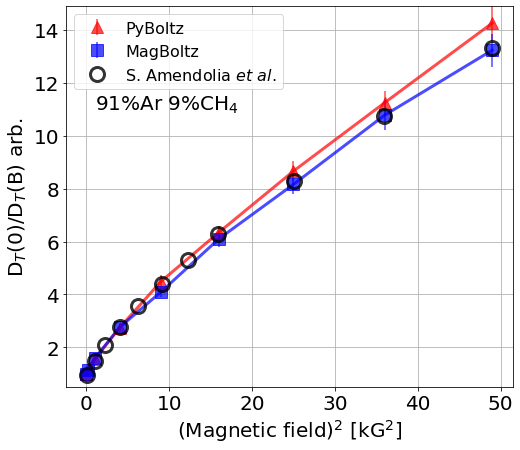

In [21]:
fig = plt.figure(figsize=(8,7))
#plt.title("Transverse Diffusion",fontsize=24)
plt.errorbar(Bfild,PyB,yerr=PyBer,fmt="^",color='r',label="PyBoltz",alpha=0.7,ms=12)
sort = np.argsort(Bfild)
plt.plot(Bfild[sort],PyB[sort],color='r',alpha=0.7,lw=3)
#plt.errorbar(Bfild[sort],PyB[sort],yerr=PyBer[sort],color='r',alpha=0.7,ms=10,lw=5)

plt.errorbar(Bfild,magB,yerr=magBer,fmt="s",color='b',label="MagBoltz",alpha=0.7,ms=12)
plt.plot(Bfild[sort],magB[sort],color='b',alpha=0.7,lw=3)

plt.errorbar(P10B[:,0],P10B[:,1],fmt='o',color='k',alpha=0.8,label="S. Amendolia $\it{et}$ $\it{al.}$"
             ,mfc='none', mec='k',ms=14,mew=3)


plt.ylim(0.5,14.9)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.legend(loc="upper left",fontsize=16)
plt.text(1,11,r"91%Ar 9%CH$_4$",fontsize=20)

plt.grid()
plt.xlabel( r'(Magnetic field)$^2$ [kG$^2$]',fontsize=20)
plt.ylabel(r"D$_T$(0)/D$_T$(B) arb.",fontsize=20)

#plt.savefig("Pyboltz_Bfield.png",dpi=250,bbox_inches='tight')
plt.show()

In [8]:
Lima = np.loadtxt("Data/Lima.csv", delimiter=',',skiprows=2)
Daniel = np.loadtxt("Data/DanielHarris.csv", delimiter=',',skiprows=2)
Youfis = np.loadtxt("Data/YoufisUrquijo.csv", delimiter=',',skiprows=2)

Pyboltz_Town = np.load("Data/TownsendN2py.npy")
MagBboltz_Town = np.load("Data/MagBoltz_N2_Data.npy")

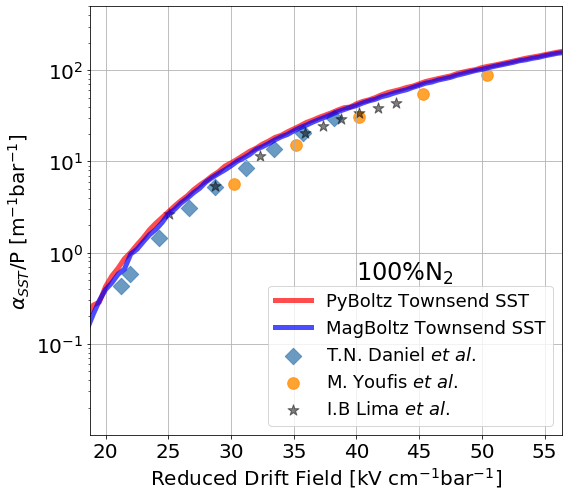

In [22]:
n0 = 101325/(1.38e-23*293.15)

plt.figure(figsize=(8,7))
Xfact = (1e-23*n0)/1000
Yfact = (1e-20*n0/100)

aa = np.copy(Pyboltz_Town[:,17])
loc = np.where(aa==0)
aa[aa==0] = Pyboltz_Town[:,15][loc]

sort = np.argsort(Pyboltz_Town[:,2])
xx = Pyboltz_Town[:,2]
yy = aa
plt.plot(xx[sort]/1000,yy[sort],label='PyBoltz Townsend SST',lw=5,color='r',alpha=0.7)

sort = np.argsort(MagBboltz_Town[:,2])
xx = MagBboltz_Town[:,2]
yy = MagBboltz_Town[:,15]
plt.plot(xx[sort]/1000,yy[sort],label='MagBoltz Townsend SST',lw=5,color='b',alpha=0.7)

plt.scatter(Daniel[:,0]*Xfact,Daniel[:,1]*Yfact,label='T.N. Daniel $\it{et}$ $\it{al.}$',marker='D',s=135,alpha=0.8,color='steelblue')
plt.scatter(Youfis[:,0]*Xfact,Youfis[:,1]*Yfact,label='M. Youfis $\it{et}$ $\it{al.}$',marker='o',s=135,alpha=0.8,color='darkorange')
plt.scatter(Lima[:,0]*Xfact,Lima[:,1]*Yfact,label='I.B Lima $\it{et}$ $\it{al.}$',marker='*',s=135,alpha=0.5,color='k')


plt.ylabel(r"$\alpha_{SST}$/P [m$^{-1}$bar$^{-1}$]",fontsize=20)
plt.xlabel("Reduced Drift Field [kV cm$^{-1}$bar$^{-1}$]",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.semilogy()
plt.grid()
plt.legend(loc='lower right',fontsize=18)
plt.text(40,0.5,r"100%N$_2$",fontsize=24)

plt.semilogy()
plt.ylim(4e-6*Yfact,2e-1*Yfact)
plt.xlim(75*Xfact,225*Xfact)
plt.tight_layout()
#plt.savefig("Townsstcomp_newunit.png",dpi=300,bbox_inches='tight')
plt.show()


In [10]:
Jeon   = np.loadtxt("Data/Jeon.csv", delimiter=',',skiprows=2)
Chanin = np.loadtxt("Data/CHANIN.csv", delimiter=',',skiprows=2)
PyboltzO2 = np.load("Data/TownsendO2py_set0.npy")
MagboltzO2 = np.load("Data/MagBoltz_O2_Data.npy")


In [11]:
from matplotlib import rc


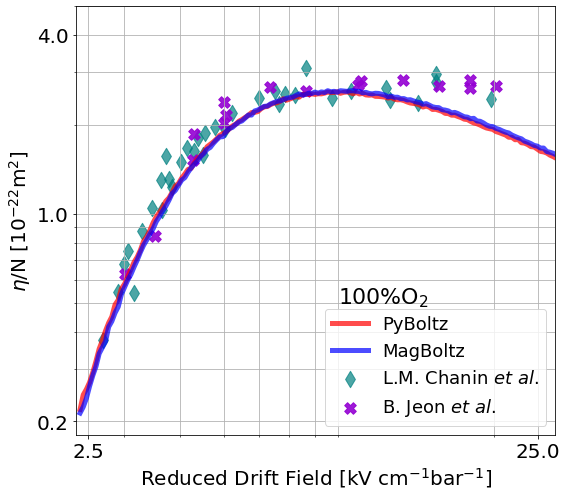

In [12]:
fig, ax = plt.subplots(figsize=(8,7))
sort = np.argsort(PyboltzO2[:,2])
ax.plot((PyboltzO2[:,2]/1000)[sort],(PyboltzO2[:,16]*(100/(2.686e25)*1e22))[sort],label="PyBoltz"
        ,lw=5,color='r',alpha=0.7)

sort = np.argsort(MagboltzO2[:,2])
ax.plot((MagboltzO2[:,2]/1000)[sort],(MagboltzO2[:,14]*(100/(2.686e25)*1e22))[sort],label="MagBoltz"
           ,lw=5,color='b',alpha=0.7)

ax.scatter(Chanin[:,0]*250/1000,Chanin[:,1],label=r"L.M. Chanin $\it{et}$ $\it{al.}$",marker='d',s=135,alpha=0.7,color="teal")
ax.scatter(Jeon[:,0]*250/1000,Jeon[:,1],label=r"B. Jeon $\it{et}$ $\it{al.}$",marker='X',s=135,alpha=0.9,color="darkviolet")


ax.set_ylabel(r"$\eta$/N [10$^{-22}$m$^{2}$]",fontsize=20)
ax.set_xlabel("Reduced Drift Field [kV cm$^{-1}$bar$^{-1}$]",fontsize=20)
plt.grid(True,which="both",ls="-")
ax.set_xscale('log')
ax.set_xticks(np.array([10*250/1000,100*250/1000]))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yscale('log')
ax.set_yticks(np.array([0.2, 1, 4]))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=10)


ax.set_xlim(9.4*250/1000,127*215/1000)
ax.set_ylim(0.18,5)

ax.legend(loc="lower right", fontsize=18)
ax.text(9,0.5,r"100%O$_2$",fontsize=22)

plt.tight_layout()
#plt.savefig("Attachment_newunit.png",dpi=300,bbox_inches='tight')
plt.show()

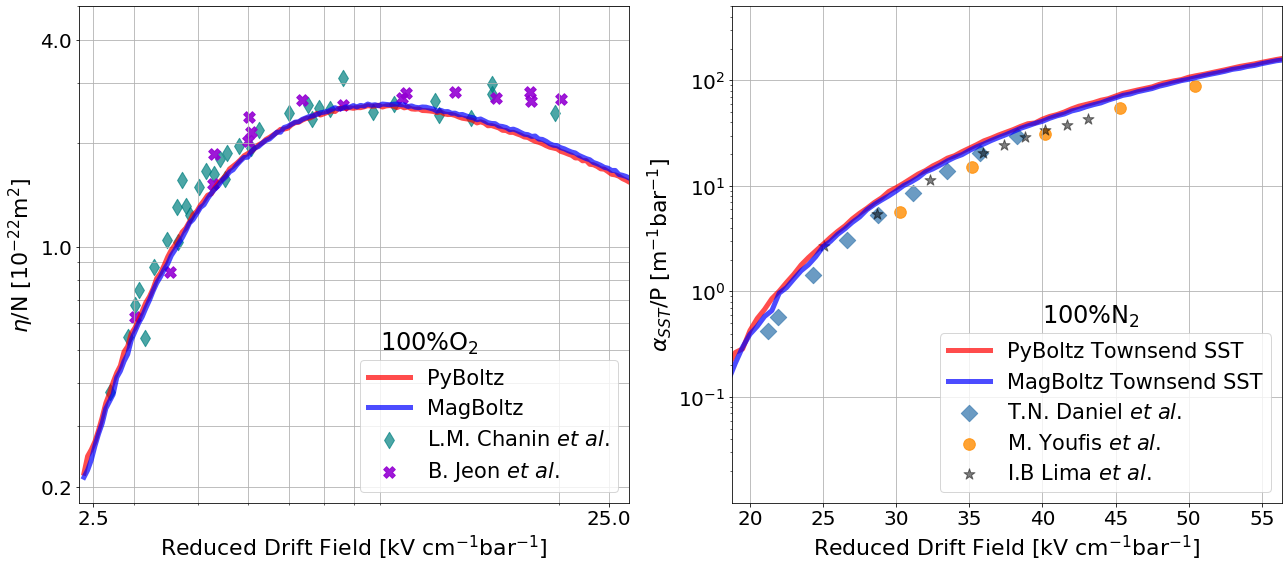

In [25]:
fig = plt.figure(figsize=(18,8))
fig.subplots_adjust()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sort = np.argsort(PyboltzO2[:,2])
ax1.plot((PyboltzO2[:,2]/1000)[sort],(PyboltzO2[:,16]*(100/(2.686e25)*1e22))[sort],label="PyBoltz"
        ,lw=5,color='r',alpha=0.7)

sort = np.argsort(MagboltzO2[:,2])
ax1.plot((MagboltzO2[:,2]/1000)[sort],(MagboltzO2[:,14]*(100/(2.686e25)*1e22))[sort],label="MagBoltz"
           ,lw=5,color='b',alpha=0.7)

ax1.scatter(Chanin[:,0]*250/1000,Chanin[:,1],label=r"L.M. Chanin $\it{et}$ $\it{al.}$",marker='d',s=135,alpha=0.7,color="teal")
ax1.scatter(Jeon[:,0]*250/1000,Jeon[:,1],label=r"B. Jeon $\it{et}$ $\it{al.}$",marker='X',s=135,alpha=0.9,color="darkviolet")


ax1.set_ylabel(r"$\eta$/N [10$^{-22}$m$^{2}$]",fontsize=22)
ax1.set_xlabel("Reduced Drift Field [kV cm$^{-1}$bar$^{-1}$]",fontsize=22)
ax1.grid(True,which="both",ls="-")
ax1.set_xscale('log')
ax1.set_xticks(np.array([10*250/1000,100*250/1000]))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_yscale('log')
ax1.set_yticks(np.array([0.2, 1, 4]))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='minor', labelsize=10)
ax1.set_xlim(9.4*250/1000,127*215/1000)
ax1.set_ylim(0.18,5)
ax1.legend(loc="lower right", fontsize=21)
ax1.text(9,0.5,r"100%O$_2$",fontsize=24)

##############################################################################
##############################################################################
##############################################################################

n0 = 101325/(1.38e-23*293.15)
Xfact = (1e-23*n0)/1000
Yfact = (1e-20*n0/100)

aa = np.copy(Pyboltz_Town[:,17])
loc = np.where(aa==0)
aa[aa==0] = Pyboltz_Town[:,15][loc]

sort = np.argsort(Pyboltz_Town[:,2])
xx = Pyboltz_Town[:,2]
yy = aa
ax2.plot(xx[sort]/1000,yy[sort],label='PyBoltz Townsend SST',lw=5,color='r',alpha=0.7)

sort = np.argsort(MagBboltz_Town[:,2])
xx = MagBboltz_Town[:,2]
yy = MagBboltz_Town[:,15]
ax2.plot(xx[sort]/1000,yy[sort],label='MagBoltz Townsend SST',lw=5,color='b',alpha=0.7)

ax2.scatter(Daniel[:,0]*Xfact,Daniel[:,1]*Yfact,label='T.N. Daniel $\it{et}$ $\it{al.}$',marker='D',s=135,alpha=0.8,color='steelblue')
ax2.scatter(Youfis[:,0]*Xfact,Youfis[:,1]*Yfact,label='M. Youfis $\it{et}$ $\it{al.}$',marker='o',s=135,alpha=0.8,color='darkorange')
ax2.scatter(Lima[:,0]*Xfact,Lima[:,1]*Yfact,label='I.B Lima $\it{et}$ $\it{al.}$',marker='*',s=135,alpha=0.5,color='k')

ax2.set_ylabel(r"$\alpha_{SST}$/P [m$^{-1}$bar$^{-1}$]",fontsize=22)
ax2.set_xlabel("Reduced Drift Field [kV cm$^{-1}$bar$^{-1}$]",fontsize=22)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='minor', labelsize=10)

ax2.set_yscale('log')
ax2.grid()
ax2.legend(loc='lower right',fontsize=21)
ax2.text(40,0.5,r"100%N$_2$",fontsize=24)

ax2.set_ylim(4e-6*Yfact,2e-1*Yfact)
ax2.set_xlim(75*Xfact,225*Xfact)


plt.tight_layout()
#plt.savefig("Pyboltz_Att_Town.png",dpi=300,bbox_inches='tight')
plt.show()